# **IAA - PRÀCTICA: MAIN**

**Instal·lar llibreries necessàries**

In [ ]:
%pip install -r ../assets/requirements.txt 

**Importar llibreries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from ucimlrepo import fetch_ucirepo 

**Llegir les dades (Cirrhosis Dataset)**

In [13]:
# Fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

data = pd.DataFrame(cirrhosis_patient_survival_prediction.data.original)

# Guardem el dataset per poder-lo visualitzar sencer
data.to_csv('../assets/data/raw_cirrhosis.csv')

**Informació del dataset inicial**

In [ ]:
data.shape

In [ ]:
data.head(-10)

In [ ]:
data.info()

**Preprocessing inicial**

In [15]:
# Reemplaçar l'string 'NaNN' per NaN
data.replace(to_replace=['NaNN', '', pd.NA], value=np.nan, inplace=True)

# Assignem els tipus de dades correctes a cada columna
int64_variables = ['N_Days', 'Age', 'Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']
float64_variables = ['Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT', 'Prothrombin']
category_variables = ['ID', 'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

data[int64_variables] = data[int64_variables].astype('Int64')
data[float64_variables] = data[float64_variables].astype('float64')
data[category_variables] = data[category_variables].astype('category')

# Renombrem les classes d'algunes variables per una millor comprensió
data['Status'] = data['Status'].replace({'D': 'Dead', 'C': 'Alive', 'CL': 'Liver Transplant'})

In [ ]:
data.head(-10)

In [ ]:
data.to_csv('../assets/data/preprocessed_cirrhosis.csv')

**Anàlisis de les variables**

In [ ]:
data.head(-10)

In [ ]:
data.isna().sum().sort_values(ascending=False)

In [ ]:
# Estudi de les variables numèriques
data.describe()

In [ ]:
# Estadístiques de les variables categòriques
data.describe(include='category')

In [ ]:
# Visualització de les distribucions de les variables numèriques en una sola figura
numerical_columns = data.select_dtypes(include=['Int64', 'float64']).columns

num_rows = int(np.ceil(len(numerical_columns) / 2))

fig = plt.figure(figsize=(10, num_rows * 4))

for i, col in enumerate(numerical_columns):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    
    sns.histplot(data[col], edgecolor="k", linewidth=1.5, kde=True)
    
    plt.xticks(rotation=45, ha='right')
    
    ax.set_title(f'Distribució de la variable numèrica {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Freqüència')

plt.tight_layout()
plt.show()

In [ ]:
# Visualització de les distribucions de les variables categòriques en una sola figura (menys ID)
categorical_columns = data.select_dtypes(include=['category']).columns.drop(['ID'])
num_rows = int(np.ceil(len(categorical_columns) / 2))

fig = plt.figure(figsize=(10, num_rows * 4))

for i, col in enumerate(categorical_columns):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    
    sns.countplot(data=data, x=col, ax=ax, hue=col, legend=False)
    
    plt.xticks(rotation=45, ha='right')
    
    ax.set_title(f'Distribució de la variable categòrica {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Quantitat')

plt.tight_layout()
plt.show()

**Tractament d'outliers**

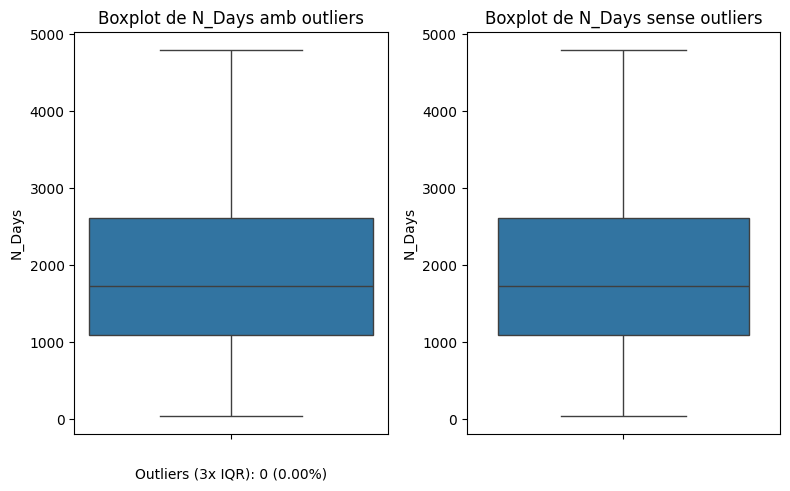

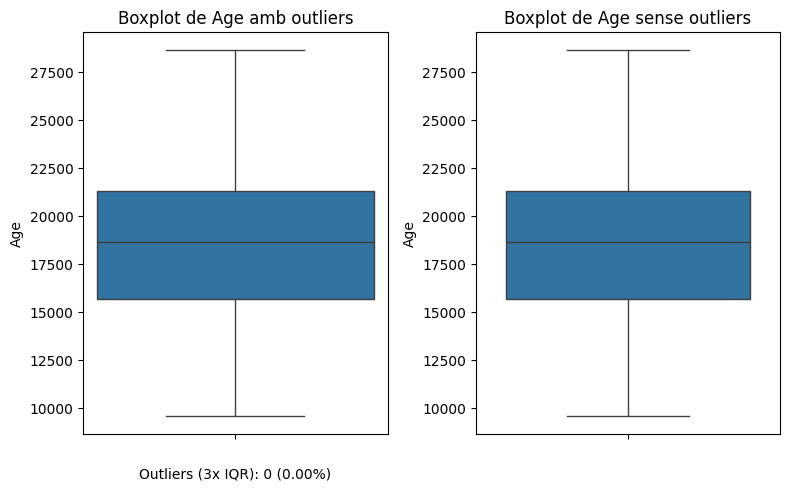

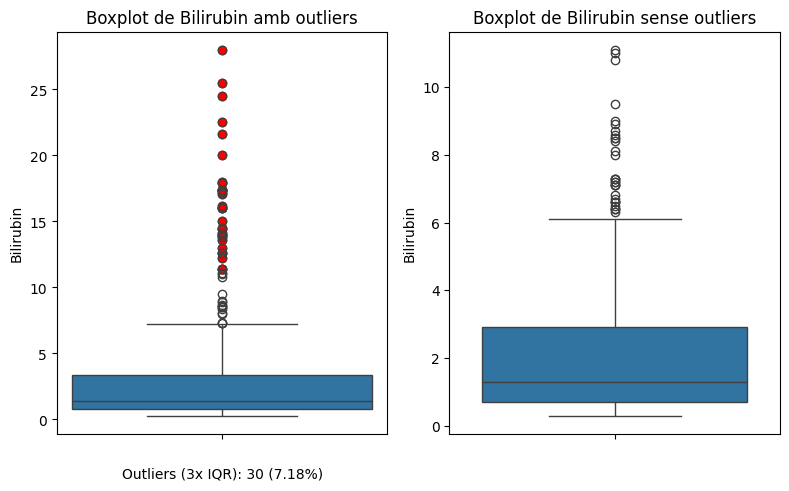

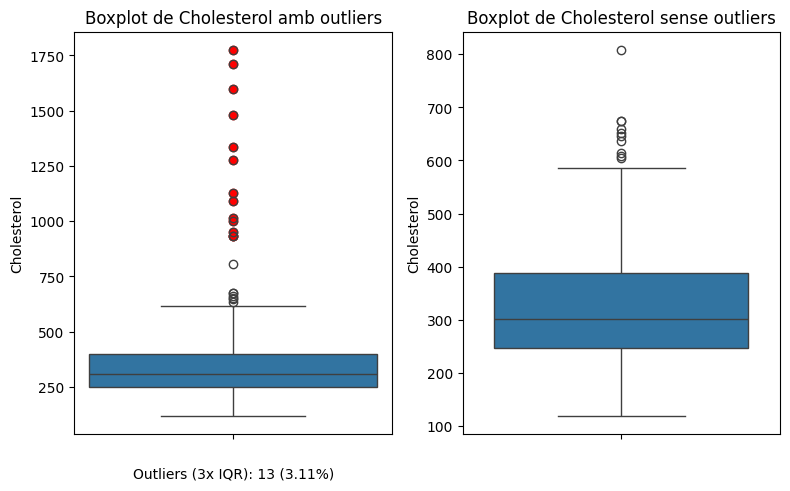

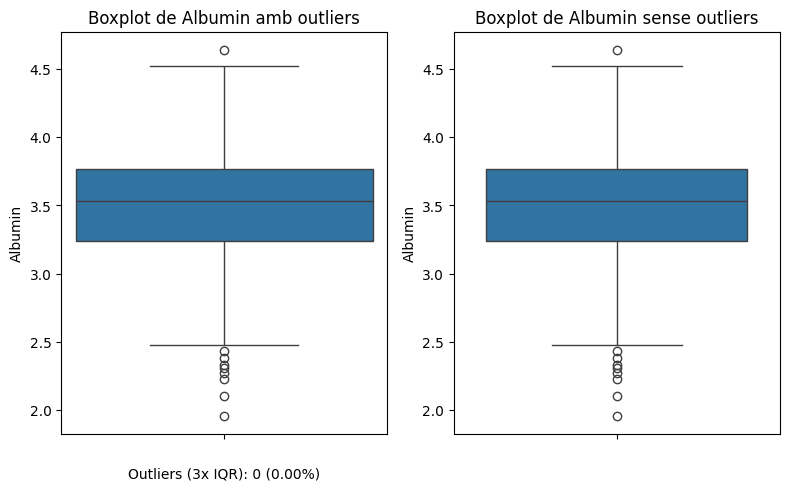

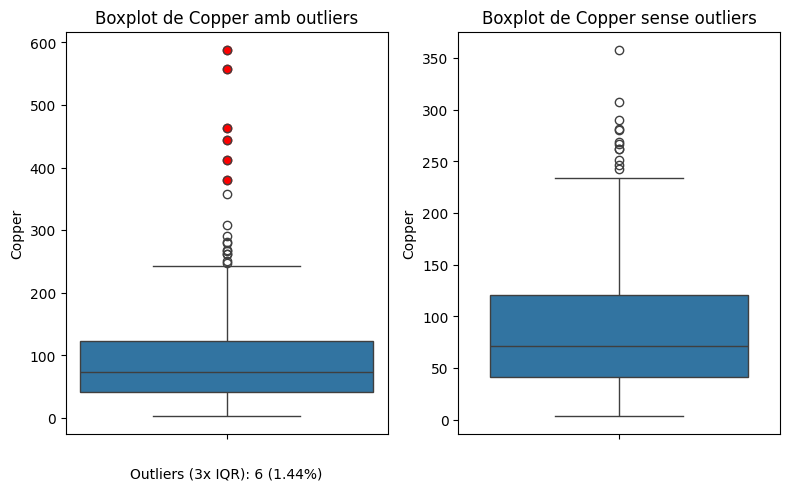

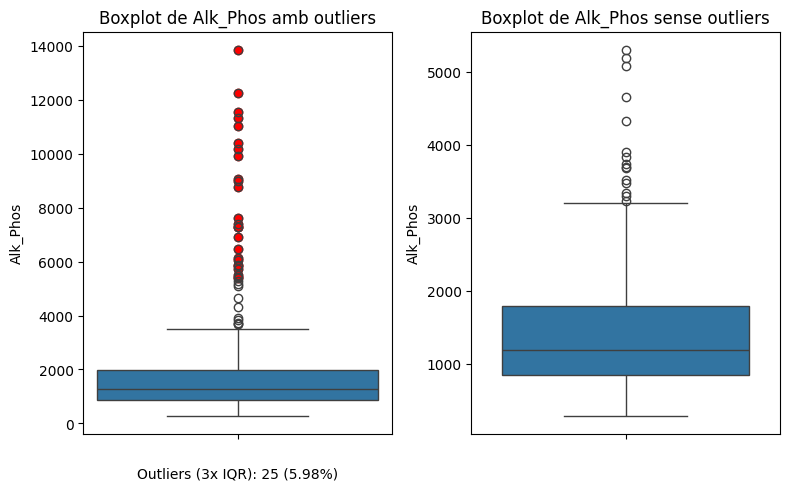

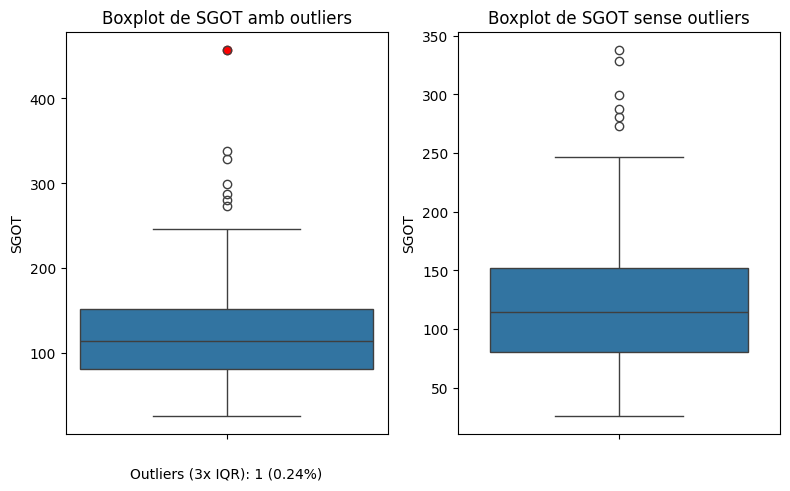

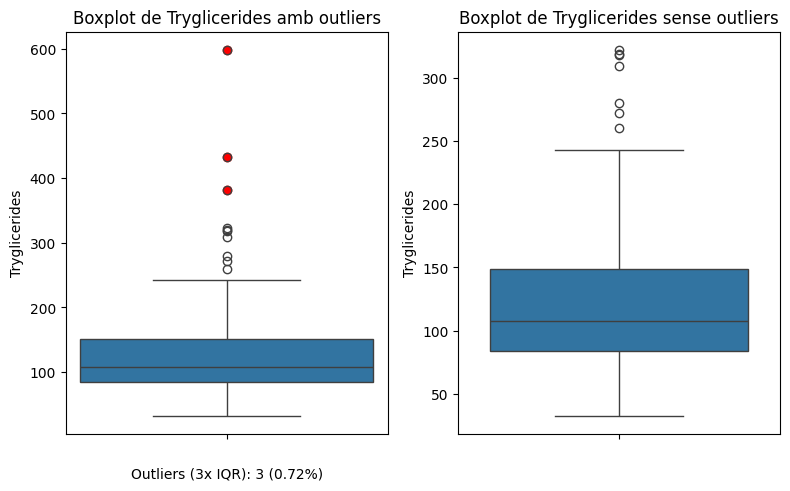

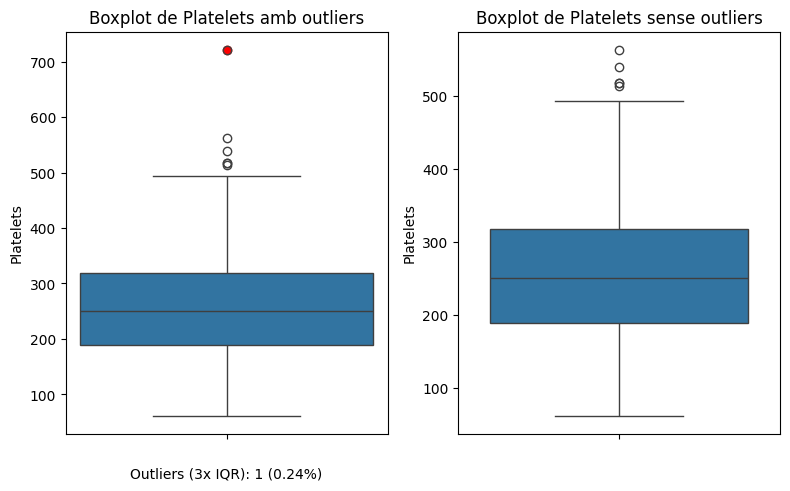

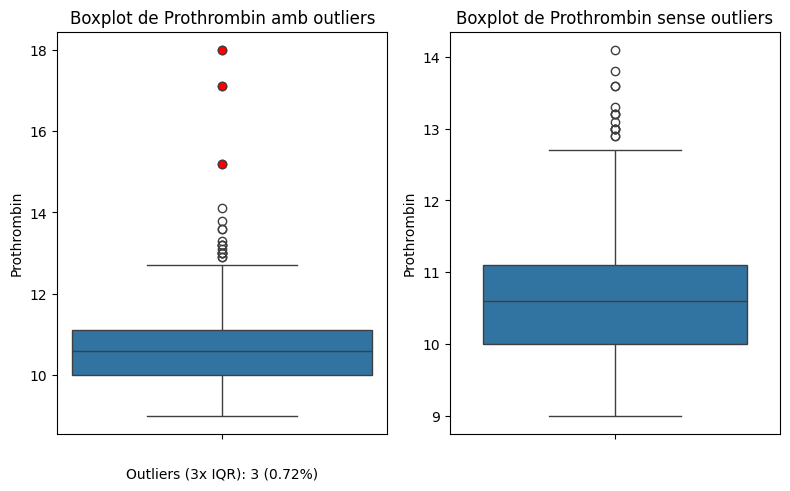

Nombre total d'outliers únics: 70 (16.75%)


In [17]:
# Detecció, visualització i eliminació d'outliers
numerical_columns = data.select_dtypes(include=['Int64', 'float64']).columns

outliers_indices = []
factor = 3

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_mask = ((data[col] < (Q1 - factor * IQR)) | (data[col] > (Q3 + factor * IQR)))
    outliers = data[col][outliers_mask]
    non_outliers = data[col][~outliers_mask]

    outliers_indices.extend(data[col][outliers_mask].index.tolist())

    fig, axes = plt.subplots(1, 2, figsize=(8, 5))

    # Boxplot amb els outliers originals
    sns.boxplot(ax=axes[0], y=data[col], orient='v')
    axes[0].scatter(x=[0]*len(outliers), y=outliers, color='red', marker='o')
    axes[0].set_title(f'Boxplot de {col} amb outliers (3x IQR)')
    
    percent_outliers = len(outliers) / data.shape[0] * 100
    axes[0].text(0.5, -0.1, f'Outliers (3x IQR): {len(outliers)} ({percent_outliers:.2f}%)', 
                 ha='center', va='center', transform=axes[0].transAxes)
    # Boxplot sense els outliers
    sns.boxplot(ax=axes[1], y=non_outliers, orient='v')
    axes[1].set_title(f'Boxplot de {col} sense outliers')

    plt.tight_layout()
    plt.show()

unique_outliers = len(set(outliers_indices))
print(f"Nombre total d'outliers únics: {unique_outliers} ({unique_outliers / data.shape[0] * 100:.2f}%)")

# Eliminació d'outliers
data = data.drop(list(set(outliers_indices)))


**Partició del dataset**

In [ ]:
# Cross

**Imputar els valors faltants (Missings)**

In [ ]:
from sklearn.impute import SimpleImputer
num_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X_train.select_dtypes(include=['object']).columns
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train[num_columns] = imputer_num.fit_transform(X_train[num_columns])
X_train[cat_columns] = imputer_cat.fit_transform(X_train[cat_columns])
X_test[num_columns] = imputer_num.transform(X_test[num_columns])
X_test[cat_columns] = imputer_cat.transform(X_test[cat_columns])

# Codificación one-hot de variables categóricas
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[cat_columns]))
X_train_encoded.columns = encoder.get_feature_names_out(cat_columns)
X_train = X_train.drop(cat_columns, axis=1)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[cat_columns]))
X_test_encoded.columns = encoder.get_feature_names_out(cat_columns)
X_test = X_test.drop(cat_columns, axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

**1r Model: K-Nearest Neighbors (KNN)**

**2n Model: Decision Tree**

**3r Model: Support Vector Machine (SVM)**